In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.metrics import *
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### Tarea Voting Regressor

1.  Implementar 3 modelos de regresión (LinearRegression, RandomForestRegressor, GradientBoostingRegressor) y evaluarlos por separado.

### Cargamos los datos

In [3]:
from sklearn.datasets import load_diabetes
load_diabetes = load_diabetes()

In [4]:
df_features = pd.DataFrame(load_diabetes.data, columns = load_diabetes.feature_names)
df = pd.DataFrame(load_diabetes.data, columns = load_diabetes.feature_names)
df['target'] = pd.DataFrame(load_diabetes.target)

### Visualizamos las primeras filas

In [6]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


### Valores nulos

In [9]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [ ]:
Como vemos no existen valores nulos. Nos ahorramos la imputación o eliminación de estos.

### Detección de outliers

In [11]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


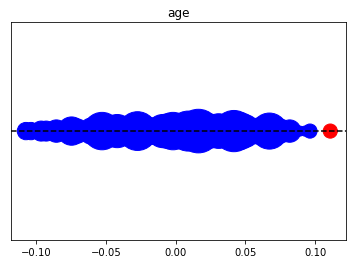

In [12]:
#### Age

ws = np.array(df['age'])
edad_unique, counts = np.unique(ws, return_counts=True)

sizes = counts*100
colors = ['blue']*len(edad_unique)
colors[-1] = 'red'

plt.axhline(1, color='k', linestyle='--')
plt.scatter(edad_unique, np.ones(len(edad_unique)), s=sizes, color=colors)
plt.yticks([])
plt.title("age")
plt.show()

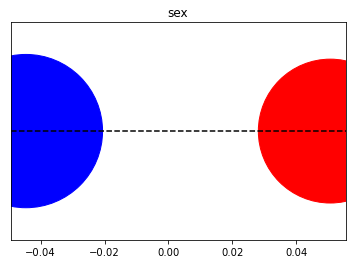

In [13]:
#### Sex

ws = np.array(df['sex'])
edad_unique, counts = np.unique(ws, return_counts=True)

sizes = counts*100
colors = ['blue']*len(edad_unique)
colors[-1] = 'red'

plt.axhline(1, color='k', linestyle='--')
plt.scatter(edad_unique, np.ones(len(edad_unique)), s=sizes, color=colors)
plt.yticks([])
plt.title("sex")
plt.show()

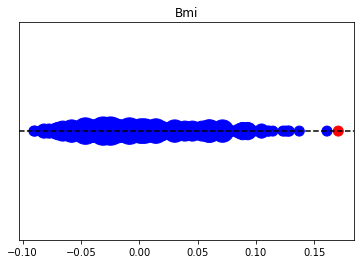

In [14]:
#### Bmi

ws = np.array(df['bmi'])
edad_unique, counts = np.unique(ws, return_counts=True)

sizes = counts*100
colors = ['blue']*len(edad_unique)
colors[-1] = 'red'

plt.axhline(1, color='k', linestyle='--')
plt.scatter(edad_unique, np.ones(len(edad_unique)), s=sizes, color=colors)
plt.yticks([])
plt.title("Bmi")
plt.show()

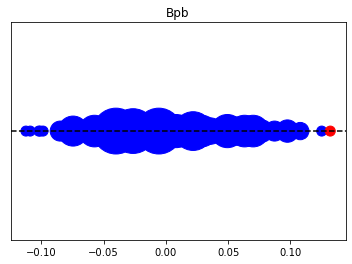

In [15]:
#### Bp

ws = np.array(df['bp'])
edad_unique, counts = np.unique(ws, return_counts=True)

sizes = counts*100
colors = ['blue']*len(edad_unique)
colors[-1] = 'red'

plt.axhline(1, color='k', linestyle='--')
plt.scatter(edad_unique, np.ones(len(edad_unique)), s=sizes, color=colors)
plt.yticks([])
plt.title("Bpb")
plt.show()

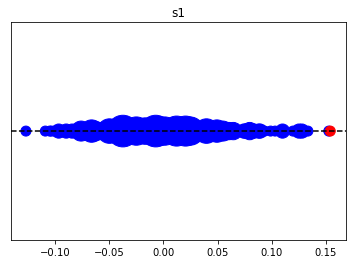

In [16]:
#### S1

ws = np.array(df['s1'])
edad_unique, counts = np.unique(ws, return_counts=True)

sizes = counts*100
colors = ['blue']*len(edad_unique)
colors[-1] = 'red'

plt.axhline(1, color='k', linestyle='--')
plt.scatter(edad_unique, np.ones(len(edad_unique)), s=sizes, color=colors)
plt.yticks([])
plt.title("s1")
plt.show()

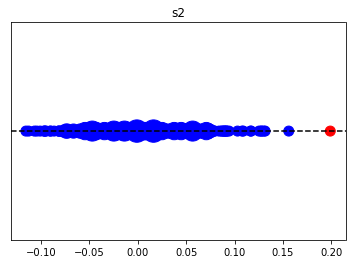

In [17]:
#### S2

ws = np.array(df['s2'])
edad_unique, counts = np.unique(ws, return_counts=True)

sizes = counts*100
colors = ['blue']*len(edad_unique)
colors[-1] = 'red'

plt.axhline(1, color='k', linestyle='--')
plt.scatter(edad_unique, np.ones(len(edad_unique)), s=sizes, color=colors)
plt.yticks([])
plt.title("s2")
plt.show()

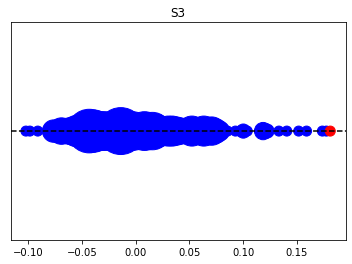

In [18]:
#### S3

ws = np.array(df['s3'])
edad_unique, counts = np.unique(ws, return_counts=True)

sizes = counts*100
colors = ['blue']*len(edad_unique)
colors[-1] = 'red'

plt.axhline(1, color='k', linestyle='--')
plt.scatter(edad_unique, np.ones(len(edad_unique)), s=sizes, color=colors)
plt.yticks([])
plt.title("S3")
plt.show()

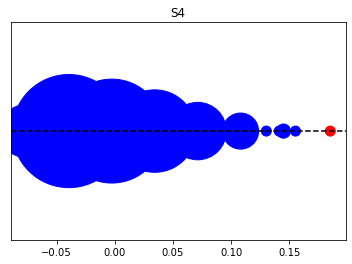

In [19]:
#### S4

ws = np.array(df['s4'])
edad_unique, counts = np.unique(ws, return_counts=True)

sizes = counts*100
colors = ['blue']*len(edad_unique)
colors[-1] = 'red'

plt.axhline(1, color='k', linestyle='--')
plt.scatter(edad_unique, np.ones(len(edad_unique)), s=sizes, color=colors)
plt.yticks([])
plt.title("S4")
plt.show()

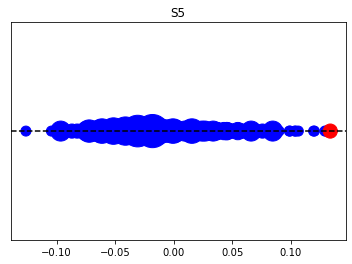

In [20]:
#### S5

ws = np.array(df['s5'])
edad_unique, counts = np.unique(ws, return_counts=True)

sizes = counts*100
colors = ['blue']*len(edad_unique)
colors[-1] = 'red'

plt.axhline(1, color='k', linestyle='--')
plt.scatter(edad_unique, np.ones(len(edad_unique)), s=sizes, color=colors)
plt.yticks([])
plt.title("S5")
plt.show()

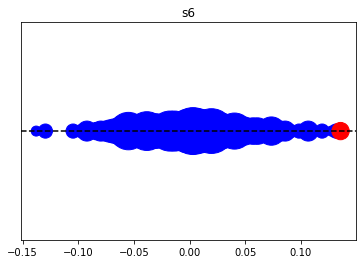

In [21]:
#### S6

ws = np.array(df['s6'])
edad_unique, counts = np.unique(ws, return_counts=True)

sizes = counts*100
colors = ['blue']*len(edad_unique)
colors[-1] = 'red'

plt.axhline(1, color='k', linestyle='--')
plt.scatter(edad_unique, np.ones(len(edad_unique)), s=sizes, color=colors)
plt.yticks([])
plt.title("s6")
plt.show()

Como hemos podido ver no existen valores outliers que puedan influir negativamente en las predicciones de los modelos. En el caso de elegir una variable en la exista algún valor outlier sería S4.  Con el fin evitar la su posible influencia eliminamos observaciones que contengan estos valores outliers.

#### Eliminación valores outliers s4

In [23]:
print(df[df['s4']  > 0.17].index)

Int64Index([123], dtype='int64')


In [24]:
df_s4 = df.drop(df[df['s4']  > 0.17].index)

Como vemos se ha eliminado una sola observación, por lo que es de suponer que el cambio en el conjunto de datos será mínimo.

### División del dataset en conjunto de entrenamiento y test

In [26]:
from sklearn.model_selection import train_test_split 
train_X, test_X, train_y, test_y = train_test_split(df_features, df['target'], test_size = 0.3)

### Creamos dos pipelines por cada modelo de regresión 

In [28]:
#### RandomForestRegressor
pipe_pca_RF = Pipeline([('scaler', StandardScaler()), ('reduce_dim', PCA()),('classifier', RandomForestRegressor())])
pipe_fs_RF = Pipeline([('scaler', StandardScaler()), ('reduce_dim', SelectKBest()), ('classifier', RandomForestRegressor())])

In [29]:
#### LinearRegression
pipe_pca_LR = Pipeline([('scaler', StandardScaler()), ('reduce_dim', PCA()),('classifier', LinearRegression())])
pipe_fs_LR = Pipeline([('scaler', StandardScaler()), ('reduce_dim', SelectKBest()), ('classifier', LinearRegression())])

In [30]:
#### GradientBoostingRegressor
pipe_pca_GB = Pipeline([('scaler', StandardScaler()), ('reduce_dim', PCA()),('classifier', GradientBoostingRegressor())])
pipe_fs_GB = Pipeline([('scaler', StandardScaler()), ('reduce_dim', SelectKBest()), ('classifier', GradientBoostingRegressor())])

In [31]:
#### Parameters RandomForestRegressor
parameters_pca_RF = {'scaler': [StandardScaler(), MinMaxScaler()],
              'reduce_dim__n_components': [2, 4, 6], 'classifier__n_estimators':[10, 15, 20], 'classifier__min_samples_leaf':[2, 3, 4]  }
parameters_fs_RF = {'scaler': [StandardScaler(), MinMaxScaler()],
              'reduce_dim__k': [2, 3, 6], 'classifier__n_estimators':[10, 15, 20], 'classifier__min_samples_leaf':[2, 3, 4]}

In [32]:
#### Parameters LinearRegression
parameters_pca_LR = {'scaler': [StandardScaler(), MinMaxScaler()],
              'reduce_dim__n_components': [2, 4, 6]}
parameters_fs_LR = {'scaler': [StandardScaler(), MinMaxScaler()],
              'reduce_dim__k': [2, 3, 6]}

In [33]:
#### Parameters GradientBoostingRegressor
parameters_pca_GB = {'scaler': [StandardScaler(), MinMaxScaler()],
              'reduce_dim__n_components': [2, 4, 6], 'classifier__n_estimators':[10, 15, 20], 'classifier__min_samples_leaf':[2, 3, 4],'classifier__learning_rate':[0.01,0.1,0.3] }
parameters_fs_GB = {'scaler': [StandardScaler(), MinMaxScaler()],
              'reduce_dim__k': [2, 3, 6], 'classifier__n_estimators':[10, 15, 20], 'classifier__min_samples_leaf':[2, 3, 4], 'classifier__learning_rate':[0.01,0.1,0.3]}

### Aplicamos hiperparametrización GridSearch

In [35]:
#### GridSearch RandomForestRegressor
grid_pca_RF = GridSearchCV(pipe_pca_RF, param_grid = parameters_pca_RF, scoring = 'neg_mean_squared_error' )
grid_fs_RF = GridSearchCV(pipe_fs_RF, param_grid = parameters_fs_RF, scoring = 'neg_mean_squared_error' )

In [36]:
#### Entrenamos el modelo
grid_pca_RF.fit(train_X,train_y)
grid_fs_RF.fit(train_X,train_y)
y_pred_grid_pca_RF = grid_pca_RF.predict(test_X)
y_pred_grid_fs_RF = grid_fs_RF.predict(test_X)

In [37]:
#### GridSearch LinearRegressor
grid_pca_LR = GridSearchCV(pipe_pca_LR, param_grid = parameters_pca_LR, scoring = 'neg_mean_squared_error' )
grid_fs_LR = GridSearchCV(pipe_fs_LR, param_grid = parameters_fs_LR, scoring = 'neg_mean_squared_error' )

In [38]:
#### Entrenamos el modelo
grid_pca_LR.fit(train_X,train_y)
grid_fs_LR.fit(train_X,train_y)
y_pred_grid_pca_LR = grid_pca_LR.predict(test_X)
y_pred_grid_fs_LR = grid_fs_LR.predict(test_X)

In [39]:
#### GridSearch GradientBoostingRegressor
grid_pca_GB = GridSearchCV(pipe_pca_GB, param_grid = parameters_pca_GB, scoring = 'neg_mean_squared_error' )
grid_fs_GB = GridSearchCV(pipe_fs_GB, param_grid = parameters_fs_GB, scoring = 'neg_mean_squared_error' )

In [40]:
#### Entrenamos el modelo
grid_pca_GB.fit(train_X,train_y)
grid_fs_GB.fit(train_X,train_y)
y_pred_grid_pca_GB = grid_pca_GB.predict(test_X)
y_pred_grid_fs_GB = grid_fs_GB.predict(test_X)

### Resultados:

#### Resultados RandomForestClassifier

In [43]:
score_pca_RF=r2_score(test_y, y_pred_grid_pca_RF)
print('r2 socre_pca_RF is',score_pca_RF)
print('mean_sqrd_error_pca_RF is ',mean_squared_error(test_y, y_pred_grid_pca_RF))
print('root_mean_squared_pca_RF error of is ',np.sqrt(mean_squared_error(test_y, y_pred_grid_pca_RF)))
print()
score_fs_RF=r2_score(test_y, y_pred_grid_fs_RF)
print('r2 socre_fs_RF is',score_fs_RF)
print('mean_sqrd_error_fs_RF is ',mean_squared_error(test_y, y_pred_grid_fs_RF))
print('root_mean_squared_fs_RF error of is ',np.sqrt(mean_squared_error(test_y, y_pred_grid_fs_RF)))

r2 socre_pca_RF is 0.37554628222982267
mean_sqrd_error_pca_RF is  3588.214214196371
root_mean_squared_pca_RF error of is  59.901704601758794

r2 socre_fs_RF is 0.36565289603302076
mean_sqrd_error_fs_RF is  3645.0632455459836
root_mean_squared_fs_RF error of is  60.374359172963345


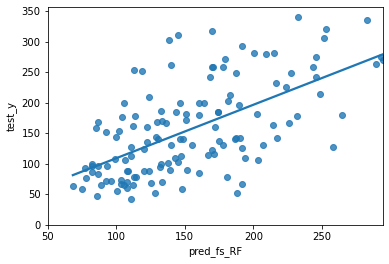

In [44]:
df_results = pd.DataFrame()
df_results['test_y'] = test_y
df_results['pred_fs_RF'] = y_pred_grid_fs_RF

sns.regplot(data=df_results, x='pred_fs_RF', y='test_y', ci=None)
plt.ylim(bottom=0)
plt.xlim(left=50)
plt.show()

#### Resultados LinearRegressionClassifier

In [46]:
score_pca_LR=r2_score(test_y, y_pred_grid_pca_LR)
print('r2 socre_pca_LR is',score_pca_LR)
print('mean_sqrd_error_pca_LR is ',mean_squared_error(test_y, y_pred_grid_pca_LR))
print('root_mean_squared_pca_LR error of is ',np.sqrt(mean_squared_error(test_y, y_pred_grid_pca_LR)))
print()
score_fs_LR=r2_score(test_y, y_pred_grid_fs_LR)
print('r2 socre_fs_LR is',score_fs_LR)
print('mean_sqrd_error_fs_LR is ',mean_squared_error(test_y, y_pred_grid_fs_LR))
print('root_mean_squared_fs_LR error of is ',np.sqrt(mean_squared_error(test_y, y_pred_grid_fs_LR)))

r2 socre_pca_LR is 0.4485564010212584
mean_sqrd_error_pca_LR is  3168.686011268749
root_mean_squared_pca_LR error of is  56.29108287525431

r2 socre_fs_LR is 0.4182315021972792
mean_sqrd_error_fs_LR is  3342.9378892026643
root_mean_squared_fs_LR error of is  57.81814498237266


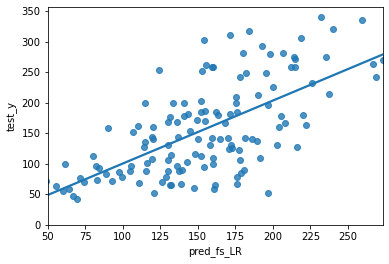

In [47]:
df_results = pd.DataFrame()
df_results['test_y'] = test_y
df_results['pred_fs_LR'] = y_pred_grid_fs_LR

sns.regplot(data=df_results, x='pred_fs_LR', y='test_y', ci=None)
plt.ylim(bottom=0)
plt.xlim(left=50)
plt.show()

#### Resultados GradientCoostingClassifier

In [49]:
score_pca_GB=r2_score(test_y, y_pred_grid_pca_GB)
print('r2 socre_pca_GB is',score_pca_GB)
print('mean_sqrd_error_pca_GB is ',mean_squared_error(test_y, y_pred_grid_pca_GB))
print('root_mean_squared_pca_GB error of is ',np.sqrt(mean_squared_error(test_y, y_pred_grid_pca_GB)))
print()
score_fs_GB=r2_score(test_y, y_pred_grid_fs_GB)
print('r2 socre_fs_GB is',score_fs_GB)
print('mean_sqrd_error_fs_GB is ',mean_squared_error(test_y, y_pred_grid_fs_GB))
print('root_mean_squared_fs_GB error of is ',np.sqrt(mean_squared_error(test_y, y_pred_grid_fs_GB)))

r2 socre_pca_GB is 0.34018251355678597
mean_sqrd_error_pca_GB is  3791.420270640804
root_mean_squared_pca_GB error of is  61.57450990987102

r2 socre_fs_GB is 0.3713750985104396
mean_sqrd_error_fs_GB is  3612.1825248749587
root_mean_squared_fs_GB error of is  60.10143529796072


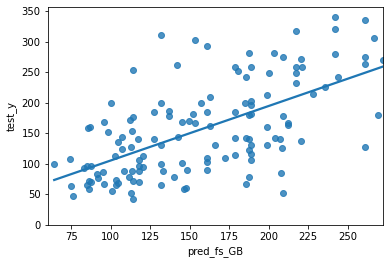

In [58]:
df_results = pd.DataFrame()
df_results['test_y'] = test_y
df_results['pred_fs_GB'] = y_pred_grid_fs_GB

sns.regplot(data=df_results, x='pred_fs_GB', y='test_y', ci=None)
plt.ylim(bottom=0)
plt.xlim(left=60)
plt.show()

### 2. Implementar un VotingRegressor conformado con los algoritmos anteriores.

In [59]:
from sklearn.ensemble import VotingRegressor

reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])

#### Creamos dos pipelines por cada modelo VotingRegressor
pipe_pca_VR = Pipeline([('scaler', StandardScaler()), ('reduce_dim', PCA()),('classifier', ereg)])
pipe_fs_VR = Pipeline([('scaler', StandardScaler()), ('reduce_dim', SelectKBest()), ('classifier', ereg)])


### Parameters VotingRegressor
parameters_pca_VR = {'scaler': [StandardScaler(), MinMaxScaler()],
              'reduce_dim__n_components': [2, 4, 6], 'classifier__rf__min_samples_leaf':[2, 3, 4], 'classifier__gb__learning_rate':[0.01,0.1,0.3]  }
parameters_fs_VR = {'scaler': [StandardScaler(), MinMaxScaler()],
              'reduce_dim__k': [2, 3, 6], 'classifier__rf__min_samples_leaf':[2, 3, 4], 'classifier__gb__learning_rate':[0.01,0.1,0.3]}

### GridSearch VotingRegressor
grid_pca_VR = GridSearchCV(pipe_pca_VR, param_grid = parameters_pca_VR, scoring = 'neg_mean_squared_error' )
grid_fs_VR = GridSearchCV(pipe_fs_VR, param_grid = parameters_fs_VR, scoring = 'neg_mean_squared_error' )

#### Entrenamos el modelo
grid_pca_VR.fit(train_X,train_y)
grid_fs_VR.fit(train_X,train_y)
y_pred_grid_pca_VR = grid_pca_VR.predict(test_X)
y_pred_grid_fs_VR = grid_fs_VR.predict(test_X)


### Resultados VotingRegressor

In [60]:
score_pca_VR=r2_score(test_y, y_pred_grid_pca_VR)
print('r2 socre_pca_VR is',score_pca_VR)
print('mean_sqrd_error_pca_VR is ',mean_squared_error(test_y, y_pred_grid_pca_VR))
print('root_mean_squared_pca_VR error of is ',np.sqrt(mean_squared_error(test_y, y_pred_grid_pca_VR)))
print()
score_fs_VR=r2_score(test_y, y_pred_grid_fs_VR)
print('r2 socre_fs_VR is',score_fs_VR)
print('mean_sqrd_error_fs_VR is ',mean_squared_error(test_y, y_pred_grid_fs_VR))
print('root_mean_squared_fs_VR error of is ',np.sqrt(mean_squared_error(test_y, y_pred_grid_fs_VR)))

r2 socre_pca_VR is 0.4365557884375406
mean_sqrd_error_pca_VR is  3237.6435135248375
root_mean_squared_pca_VR error of is  56.90029449418375

r2 socre_fs_VR is 0.41420163754284667
mean_sqrd_error_fs_VR is  3366.0941571899166
root_mean_squared_fs_VR error of is  58.018050270497


In [61]:
df_results = pd.DataFrame()
df_results['test_y'] = test_y
df_results['pred_fs_VR'] = y_pred_grid_fs_VR

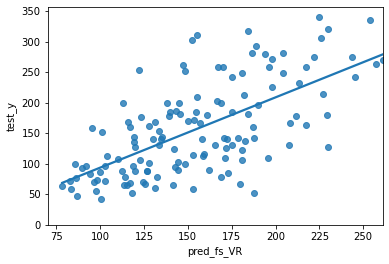

In [62]:
sns.regplot(data=df_results, x='pred_fs_VR', y='test_y', ci=None)
plt.ylim(bottom=0)
plt.xlim(left=70)
plt.show()

### Conclusión:

Como hemos visto los resultados no difieren en exceso entre los diferentes modelos. Si hemos notado que aquellos modelos en los que se ha aplicado PCA han realizado mejores predicciones. El error medio ha sido en el mejor de los casos de 56 puntos y en el peor de 61. Teniendo en cuenta el contexto de la situación en la que se aplicaría el modelo, podemos decir que los resultados no son buenos. Una posible opción de mejora en los resultados sería ampliar el rango de parámetros a optimizar o utilizar algoritmos de optimización. Destacamos la importancia de elegir la métrica de evaluación asociada a modelos de regresión en GridSearch. 